In [1]:
# Data analysis and wrangling
import requests
import pandas as pd
import numpy as np
from collections import OrderedDict

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# Data modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier   # average accuracy 31
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

In [2]:
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/flying-etiquette-survey/flying-etiquette.csv"
df = pd.read_csv(url)
df = pd.DataFrame(df)
df.head()  #Display head of data

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
0,3436139758,Once a year or less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3434278696,Once a year or less,About half the time,"6'3""",Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude","No, not at all rude","No, not at all rude",No,No,Male,30-44,NaN,Graduate degree,Pacific
2,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific
3,3434268208,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific
4,3434250245,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific


In [3]:
print(df.columns.values)  #Get columns' name

['RespondentID' 'How often do you travel by plane?'
 'Do you ever recline your seat when you fly?' 'How tall are you?'
 'Do you have any children under 18?'
 'In a row of three seats, who should get to use the two arm rests?'
 'In a row of two seats, who should get to use the middle arm rest?'
 'Who should have control over the window shade?'
 'Is itrude to move to an unsold seat on a plane?'
 'Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?'
 "On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?"
 'Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?'
 'Is itrude to recline your seat on a plane?'
 'Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?'
 'Is it rude to ask someone to switch seats with you in order to be closer to friends?'
 'Is it

In [4]:
df_0 = df

df_0 = df_0.iloc[:, 1:] #Remove ID colum

df_0 = df_0.rename(index = str, columns = {"How often do you travel by plane?": "Travel_Frequency",
                                           "Do you ever recline your seat when you fly?": "Recline_Frequency",
                                           "How tall are you?": "Height",
                                           "Do you have any children under 18?": "Children_under_18",
                                           'In a row of three seats, who should get to use the two arm rests?': 'RestArm_threeSeats',
                                           'In a row of two seats, who should get to use the middle arm rest?': 'RestArm_twoSeats',
                                           'Who should have control over the window shade?': 'Window_control',
                                           'Is itrude to move to an unsold seat on a plane?': 'Switch_seats_unsold',
                                           'Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?': 'Speak_Stranger',
                                           "On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?": "GetUp_5H_notAisle",
                                           "Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?": "Recline_obligation",
                                           "Is itrude to recline your seat on a plane?": "Recline_rude",
                                           "Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?": "Recline_eliminate",
                                           "Is it rude to ask someone to switch seats with you in order to be closer to friends?": "Switch_seats_friends",
                                           "Is itrude to ask someone to switch seats with you in order to be closer to family?": "Switch_seats_family",
                                           "Is it rude to wake a passenger up if you are trying to go to the bathroom?": "WakeUp_passenger_bathroom",
                                           "Is itrude to wake a passenger up if you are trying to walk around?": "WakeUp_passenger_walkAround",
                                           "In general, is itrude to bring a baby on a plane?": "Bring_Baby",
                                           "In general, is it rude to knowingly bring unruly children on a plane?": "Bring_children_unruly",
                                           "Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?": "Electronics_violation",
                                           "Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?": "Smoked_inAirplane",
                                           "Household Income": "Household_Income",
                                           "Location (Census Region)": "Location_Customer"
                                           })  #Rename the columns



for col in df_0:
    print (df_0[col].unique()) #Display the unique records in each column
    print (df_0[col].nunique()) #Number of unique records


['Once a year or less' 'Once a month or less' 'Never'
 'A few times per week' 'Every day' 'A few times per month']
6
[nan 'About half the time' 'Usually' 'Always' 'Once in a while' 'Never']
5
[nan '6\'3"' '5\'8"' '5\'11"' '5\'7"' '5\'9"' '6\'2"' '6\'0"' '5\'6"'
 '6\'1"' '5\'10"' '5\'5"' '6\'4"' '6\'6" and above' 'Under 5 ft.' '6\'5"'
 '5\'4"' '5\'0"' '5\'3"' '5\'1"' '5\'2"']
20
[nan 'Yes' 'No']
2
[nan 'The arm rests should be shared'
 'Whoever puts their arm on the arm rest first'
 'The person in the middle seat gets both arm rests'
 'Other (please specify)'
 'The people in the aisle and window seats get both arm rests']
5
[nan 'The arm rests should be shared' 'The person in aisle'
 'Whoever puts their arm on the arm rest first' 'Other (please specify)'
 'The person by the window']
5
[nan 'Everyone in the row should have some say'
 'The person in the window seat should have exclusive control']
2
[nan 'No, not rude at all' 'Yes, somewhat rude' 'Yes, very rude']
3
[nan 'No, not at all ru

In [5]:
print(len(df_0) - df_0.count())   # Check NAs 

Travel_Frequency                 0
Recline_Frequency              182
Height                         182
Children_under_18              189
RestArm_threeSeats             184
RestArm_twoSeats               184
Window_control                 184
Switch_seats_unsold            185
Speak_Stranger                 185
GetUp_5H_notAisle              185
Recline_obligation             186
Recline_rude                   186
Recline_eliminate              186
Switch_seats_friends           190
Switch_seats_family            190
WakeUp_passenger_bathroom      190
WakeUp_passenger_walkAround    190
Bring_Baby                     191
Bring_children_unruly          191
Electronics_violation          191
Smoked_inAirplane              191
Gender                          33
Age                             33
Household_Income               214
Education                       39
Location_Customer               42
dtype: int64


In [6]:
df_1 = df_0
df_1

,Travel_Frequency,Recline_Frequency,Height,Children_under_18,RestArm_threeSeats,RestArm_twoSeats,Window_control,Switch_seats_unsold,Speak_Stranger,GetUp_5H_notAisle,...,WakeUp_passenger_walkAround,Bring_Baby,Bring_children_unruly,Electronics_violation,Smoked_inAirplane,Gender,Age,Household_Income,Education,Location_Customer
0,Once a year or less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Once a year or less,About half the time,"6'3""",Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",Twice,...,"No, not at all rude","No, not at all rude","No, not at all rude",No,No,Male,30-44,NaN,Graduate degree,Pacific
2,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",Three times,...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific
3,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",Three times,...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific
4,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",Twice,...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific
5,Once a year or less,Usually,"5'9""",Yes,Whoever puts their arm on the arm rest first,Whoever puts their arm on the arm rest first,The person in the window seat should have excl...,"Yes, somewhat rude","No, not at all rude",Once,...,"Yes, very rude","Yes, very rude","Yes, very rude",No,No,Male,30-44,"$25,000 - $49,999",Graduate degree,East North Central
6,Once a month or less,Once in a while,"6'2""",Yes,The person in the middle seat gets both arm rests,Whoever puts their arm on the arm rest first,Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",Twice,...,"No, not at all rude","No, not at all rude","Yes, somewhat rude",No,No,Male,30-44,150000,Some college or Associate degree,Pacific
7,Once a year or less,Once in a while,"6'0""",Yes,The arm rests should be shared,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",Four times,...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,New England
8,Once a year or less,Once in a while,"6'0""",Yes,The arm rests should be shared,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",Four times,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Once a year or less,Never,"5'6""",No,Other (please specify),Other (please specify),Everyone in the row should have some say,"Yes, very rude","Yes, very rude",It is not okay to get up during flight,...,"Yes, very rude","Yes, very rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific


In [7]:
df_1 = df_1.dropna(subset = ['Travel_Frequency', 'RestArm_twoSeats', 'Height', 'Children_under_18', 'Gender', 'Age', 'Education', 'Location_Customer'])  #Remove rows contains more than 1 blanks
df_1.reset_index(drop = True, inplace = True) #Reset index
df_1.index = np.arange(1, len(df_1)+1)
print(df_1.shape) #687 rows * 27 columns
print(len(df_1) - df_1.count())   # Check NAs for each column

(827, 26)
Travel_Frequency                 0
Recline_Frequency                0
Height                           0
Children_under_18                0
RestArm_threeSeats               0
RestArm_twoSeats                 0
Window_control                   0
Switch_seats_unsold              0
Speak_Stranger                   0
GetUp_5H_notAisle                0
Recline_obligation               0
Recline_rude                     0
Recline_eliminate                0
Switch_seats_friends             0
Switch_seats_family              0
WakeUp_passenger_bathroom        0
WakeUp_passenger_walkAround      0
Bring_Baby                       0
Bring_children_unruly            0
Electronics_violation            0
Smoked_inAirplane                0
Gender                           0
Age                              0
Household_Income               140
Education                        0
Location_Customer                0
dtype: int64


In [8]:
df_1.columns.values

array(['Travel_Frequency', 'Recline_Frequency', 'Height',
       'Children_under_18', 'RestArm_threeSeats', 'RestArm_twoSeats',
       'Window_control', 'Switch_seats_unsold', 'Speak_Stranger',
       'GetUp_5H_notAisle', 'Recline_obligation', 'Recline_rude',
       'Recline_eliminate', 'Switch_seats_friends', 'Switch_seats_family',
       'WakeUp_passenger_bathroom', 'WakeUp_passenger_walkAround',
       'Bring_Baby', 'Bring_children_unruly', 'Electronics_violation',
       'Smoked_inAirplane', 'Gender', 'Age', 'Household_Income',
       'Education', 'Location_Customer'], dtype=object)

In [9]:
# Fill up missing values by Machine Learning Classifier

# Create dummies variables for modeling
df_1_ML = df_1

df_1_ML_D = pd.get_dummies(df_1, columns = ['Travel_Frequency', 'Recline_Frequency', 'Height',
                                          'Children_under_18', 'RestArm_threeSeats', 'RestArm_twoSeats',
                                          'Window_control', 'Switch_seats_unsold', 'Speak_Stranger',
                                          'GetUp_5H_notAisle', 'Recline_obligation', 'Recline_rude',
                                          'Recline_eliminate', 'Switch_seats_friends', 'Switch_seats_family',
                                          'WakeUp_passenger_bathroom', 'WakeUp_passenger_walkAround',
                                          'Bring_Baby', 'Bring_children_unruly', 'Electronics_violation',
                                          'Smoked_inAirplane', 'Gender', 'Age', 'Education', 'Location_Customer'])
df_1_ML_D.drop(['Household_Income',], axis = 1, inplace = True)

# Join the dataframe that contains dummies variables into original dataframe
df_1_ML = pd.concat([df_1_ML, df_1_ML_D], axis = 1) 

df_1_ML.drop(['Travel_Frequency', 'Recline_Frequency', 'Height',
              'Children_under_18', 'RestArm_threeSeats', 'RestArm_twoSeats',
              'Window_control', 'Switch_seats_unsold', 'Speak_Stranger',
              'GetUp_5H_notAisle', 'Recline_obligation', 'Recline_rude',
              'Recline_eliminate', 'Switch_seats_friends', 'Switch_seats_family',
              'WakeUp_passenger_bathroom', 'WakeUp_passenger_walkAround',
              'Bring_Baby', 'Bring_children_unruly', 'Electronics_violation',
              'Smoked_inAirplane', 'Gender', 'Age', 'Education', 'Location_Customer',], axis = 1, inplace = True)

print(len(df_1_ML.columns.values))   # number of columns/features
print(len(df_1_ML))                  # number of rows

106
827


In [10]:
# split data into 'with Label' set and 'without Label' set

# split 'with Label' set
actual = df_1_ML[df_1_ML['Household_Income'].notnull()]

actual_X = actual.loc[: , actual.columns != 'Household_Income']
actual_y = actual['Household_Income']

# split 'without Label' set
predict = df_1_ML[df_1_ML['Household_Income'].isnull()]

predict_X = predict.loc[: , predict.columns != 'Household_Income']
predict_y = predict['Household_Income']

In [11]:
# Check model performaance in using selected features to predict 'Household_Income'

# split 'with Label' set into trainning set and testing set
actual_X_train, actual_X_test, actual_y_train, actual_y_test = train_test_split(actual_X, actual_y, test_size = 0.2)

In [12]:
# Compare thte accuracy of different models

# Random Forest model
model_test = RandomForestClassifier(n_estimators = 1012, max_features = None,
                                    max_depth = 212, min_samples_split = 15, min_samples_leaf = 10,
                                    random_state = 123)

model_test.fit(actual_X_train, actual_y_train)
actual_y_predict = model_test.predict(actual_X_test)

print("Random Forest: ", accuracy_score(actual_y_test, actual_y_predict))   

# Decision Tree
model_D = DecisionTreeClassifier(max_depth = 1000, min_samples_split = 15, min_samples_leaf = 10, random_state = 42)
model_D.fit(actual_X_train, actual_y_train)
result_predict = model_D.predict(actual_X_test)

print("Decision Tree: ", accuracy_score(actual_y_test, result_predict))

# KNN
model_KNN = KNeighborsClassifier(n_neighbors = 30)
model_KNN.fit(actual_X_train, actual_y_train)
result_predict_KNN = model_KNN.predict(actual_X_test)

print("KNN: ", accuracy_score(actual_y_test, result_predict_KNN))

# AdaBoostClassifier()
model_Ada = AdaBoostClassifier(learning_rate = 1, random_state = 42)
model_Ada.fit(actual_X_train, actual_y_train)
result_predict_Ada = model_Ada.predict(actual_X_test)

print("AdaBoost: ", accuracy_score(actual_y_test, result_predict_Ada))

# GaussianNB
model_NB = GaussianNB()
model_NB.fit(actual_X_train, actual_y_train)
result_predict_NB = model_NB.predict(actual_X_test)

print("NB: ", accuracy_score(actual_y_test, result_predict_NB))

Random Forest:  0.384057971014
Decision Tree:  0.260869565217
KNN:  0.376811594203
AdaBoost:  0.355072463768
NB:  0.166666666667


In [13]:
# Choose RandomForestClassifier and KNN as our test models 

# Random Forest Model Optimization

# Create a list for features' names and importances of features
feature_names = np.array(actual_X_train.columns.values).tolist()
importances = np.array(model_test.feature_importances_).tolist()

# check importance of features
f_i_list = {'Features': feature_names, 'Score': importances}
f_i_list = pd.DataFrame(f_i_list)
f_i_list.sort_values('Score', ascending = False).head()

,Features,Score
87,Age_18-29,0.085349
4,Travel_Frequency_Once a year or less,0.079794
92,Education_Graduate degree,0.040764
89,Age_45-60,0.031092
85,Gender_Female,0.030734


In [14]:
# print the number of features with positive contribution
print(len(f_i_list[f_i_list['Score'] > 0]))

84


In [15]:
# Method No.1 - Drop the features with 0 contribution 

# Trim original data set to drop the features with 0 contribution 
features_new = f_i_list[f_i_list['Score'] > 0]
features_new_list = features_new['Features'].tolist()

# New Data Frame with the features that contributed to the model

# Select the features with 0 contribution
features_s = [f for f in actual_X_train.columns if f not in features_new_list]

# Drop these features and create a new Data Frame contains only the features with positive contribution
features_X_train = actual_X_train.drop(features_s, axis = 1)
features_X_test = actual_X_test.drop(features_s, axis = 1)

# Random Forest Model
# Random Forest model
model_test_1 = RandomForestClassifier(n_estimators = 1012, criterion = 'gini', max_features = None,
                                    max_depth = 256, min_samples_split = 15, min_samples_leaf = 10,
                                    random_state = 42)

model_test_1.fit(features_X_train, actual_y_train)
features_y_predict = model_test_1.predict(features_X_test)

print("Random Forest: ", accuracy_score(actual_y_test, features_y_predict))

# KNN
model_KNN_1 = KNeighborsClassifier(n_neighbors = 30)
model_KNN_1.fit(features_X_train, actual_y_train)
result_predict_KNN_1 = model_KNN_1.predict(features_X_test)

print("KNN: ", accuracy_score(actual_y_test, result_predict_KNN_1))

Random Forest:  0.376811594203
KNN:  0.376811594203


In [16]:
len(actual_y_train)

549

In [17]:
# Method No.2 - Use the features from demographic census

df_1_ML_2 = df_1[['Travel_Frequency', 'Recline_Frequency', 'Height', 'Children_under_18',
                 'Gender', 'Age', 'Education', 'Location_Customer', 'Household_Income']]

# Get dummies
df_1_ML_2_D = pd.get_dummies(df_1_ML_2, columns = ['Travel_Frequency', 'Recline_Frequency', 'Height', 'Children_under_18',
                                                   'Gender', 'Age', 'Education', 'Location_Customer'])
df_1_ML_2_D.drop(['Household_Income',], axis = 1, inplace = True)

#Join the dataframe that contains dummies variables into original dataframe
df_1_ML_2 = pd.concat([df_1_ML_2, df_1_ML_2_D], axis = 1) 

df_1_ML_2.drop(['Travel_Frequency', 'Recline_Frequency', 'Height', 'Children_under_18',
                 'Gender', 'Age', 'Education', 'Location_Customer'], axis = 1, inplace = True)


# split 'with Label' set
actual_2 = df_1_ML_2[df_1_ML_2['Household_Income'].notnull()]

actual_2_X = actual_2.loc[: , actual_2.columns != 'Household_Income']
actual_2_y = actual_2['Household_Income']

# split 'with Label' set into trainning set and testing set
actual_2_X_train, actual_2_X_test, actual_2_y_train, actual_2_y_test = train_test_split(actual_2_X, actual_2_y, test_size = 0.2)

# Random Forest model
model_test_2 = RandomForestClassifier(n_estimators = 1012, criterion = 'gini', max_features = None,
                                    max_depth = 256, min_samples_split = 15, min_samples_leaf = 10,
                                    random_state = 42)

model_test_2.fit(actual_2_X_train, actual_2_y_train)
features_y_predict_2 = model_test_2.predict(actual_2_X_test)

print("Random Forest_Method2: ", accuracy_score(actual_2_y_test, features_y_predict_2))

# KNN
model_KNN_2 = KNeighborsClassifier(n_neighbors = 30)
model_KNN_2.fit(actual_2_X_train, actual_2_y_train)
result_predict_KNN_2 = model_KNN_2.predict(actual_2_X_test)

print("KNN: ", accuracy_score(actual_2_y_test, result_predict_KNN_2))

Random Forest_Method2:  0.369565217391
KNN:  0.355072463768


In [18]:
# Method No.3 - SelectFromModel function

# create feature selector by RandomForestClassifier
selector = SelectFromModel(model_test, threshold = 0.005)

# train the selector
selector.fit(actual_X_train, actual_y_train)

# Create a new DateFrame with only the most important features
actual_X_important_train = selector.transform(actual_X_train)
actual_X_important_test = selector.transform(actual_X_test)

# print number of important features
len(actual_X_important_train[0])   # 55

# Create new RandomForestClassifier
model_test_3 = RandomForestClassifier(n_estimators = 1024, criterion = 'gini', max_features = None,
                                    max_depth = 556, min_samples_split = 15, min_samples_leaf = 1,
                                    random_state = 42)

model_test_3.fit(actual_X_important_train, actual_y_train)

model_test_3_predict = model_test_3.predict(actual_X_important_test)

print("SelectFromModel", accuracy_score(actual_y_test, model_test_3_predict))  

# KNN
model_KNN_3 = KNeighborsClassifier(n_neighbors = 25)
model_KNN_3.fit(actual_X_important_train, actual_y_train)
result_predict_KNN_3 = model_KNN_3.predict(actual_X_important_test)

print("KNN: ", accuracy_score(actual_y_test, result_predict_KNN_3))

SelectFromModel 0.355072463768
KNN:  0.384057971014


In [19]:
# predict missing values in Household Income by RandomForest Classifier
predict_X_1 = predict_X.drop(features_s, axis = 1)

pr = model_test_1.predict(predict_X_1)

# replace the missing value in Household Income by the prediction results
df_1.loc[df_1['Household_Income'].isnull(), 'Household_Income'] = pr

# check if there is still missing values
len(df_1.loc[df_1['Household_Income'].isnull()])



C:\Users\hcysr\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\hcysr\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


0

In [20]:
# Create new data frame for future use
df_S1 = df_1

In [21]:
# check distribution of each value in different features
for col in df_1.columns:
    print(df_1[col].value_counts())

Once a year or less      603
Once a month or less     192
A few times per month     29
A few times per week       2
Every day                  1
Name: Travel_Frequency, dtype: int64
Once in a while        250
Usually                174
Never                  162
Always                 128
About half the time    113
Name: Recline_Frequency, dtype: int64
5'4"              75
5'6"              74
5'7"              74
5'8"              72
5'5"              70
5'9"              69
5'10"             66
6'0"              53
5'11"             51
5'3"              47
5'2"              43
6'2"              26
6'1"              25
5'1"              19
6'3"              17
5'0"              16
Under 5 ft.       12
6'4"              11
6'5"               6
6'6" and above     1
Name: Height, dtype: int64
No     643
Yes    184
Name: Children_under_18, dtype: int64
The arm rests should be shared                                 568
The person in the middle seat gets both arm rests              116
Whoe

In [22]:
# Point of Commen sense

# Evaluation point based on the distribution of values

# For binary columns: 0, 4
# For three selection columns: 1, 2, 3
# For five selection columns: 0, 1, 2, 3, 4
# For six selection columns: 0, 1, 2, 3, 4, 5
# average point in each column is around 2 - 3

df_1['RestArm_threeSeats'] = df_1['RestArm_threeSeats'].map({'Whoever puts their arm on the arm rest first': 2,
                                                             'The arm rests should be shared': 4,
                                                             'The person in the middle seat gets both arm rests': 3,
                                                             'Other (please specify)': 1,
                                                             'The people in the aisle and window seats get both arm rests': 0})

df_1['RestArm_twoSeats'] = df_1['RestArm_twoSeats'].map({'The arm rests should be shared': 4, 
                                                         'The person in aisle': 2,
                                                         'Whoever puts their arm on the arm rest first': 3, 
                                                         'Other (please specify)': 0, 
                                                         'The person by the window': 1})

df_1['Window_control'] = df_1['Window_control'].map({'The person in the window seat should have exclusive control': 0, 
                                                     'Everyone in the row should have some say': 4})

df_1['Switch_seats_unsold'] = df_1['Switch_seats_unsold'].map({'No, not rude at all': 3, 
                                                               'Yes, somewhat rude': 2, 
                                                               'Yes, very rude': 1})

df_1['Speak_Stranger'] = df_1['Speak_Stranger'].map({'No, not at all rude': 3,   
                                                     'Yes, somewhat rude': 2,    
                                                     'Yes, very rude': 1})       

df_1['GetUp_5H_notAisle'] = df_1['GetUp_5H_notAisle'].map({'Three times': 5,
                                                           'Twice': 4,
                                                           'Once': 1,
                                                           'Four times': 3,
                                                           'It is not okay to get up during flight': 0,
                                                           'More than five times times': 2})

df_1['Recline_obligation'] = df_1['Recline_obligation'].map({'Yes, they should not recline their chair if the person behind them asks them not to': 4,
                                                             'No, the person on the flight has no obligation to the person behind them': 0})

df_1['Recline_rude'] = df_1['Recline_rude'].map({'No, not rude at all': 3,    
                                                 'Yes, somewhat rude': 2,       
                                                 'Yes, very rude': 1})         
 
df_1['Recline_eliminate'] = df_1['Recline_eliminate'].map({'No': 4,           
                                                           'Yes': 0})         

df_1['Switch_seats_friends'] = df_1['Switch_seats_friends'].map({'No, not at all rude': 3,                
                                                                 'Yes, somewhat rude': 2,                 
                                                                 'Yes, very rude': 1})                    

df_1['Switch_seats_family'] = df_1['Switch_seats_family'].map({'No, not at all rude': 3,                  
                                                               'Yes, very rude': 1,                       
                                                               'Yes, somewhat rude': 2})                  

df_1['WakeUp_passenger_bathroom'] = df_1['WakeUp_passenger_bathroom'].map({'No, not at all rude': 3,     
                                                                           'Yes, somewhat rude': 2,      
                                                                           'Yes, very rude': 1})         

df_1['WakeUp_passenger_walkAround'] = df_1['WakeUp_passenger_walkAround'].map({'Yes, somewhat rude': 3,
                                                                               'Yes, very rude': 1,
                                                                               'No, not at all rude': 2})

df_1['Bring_Baby'] = df_1['Bring_Baby'].map({'Yes, somewhat rude': 2,
                                             'Yes, very rude': 1,
                                             'No, not at all rude': 3})

df_1['Bring_children_unruly'] = df_1['Bring_children_unruly'].map({'Yes, very rude': 3,
                                                                   'Yes, somewhat rude': 2,
                                                                   'No, not at all rude': 1})

df_1['Electronics_violation'] = df_1['Electronics_violation'].map({'No': 4, 
                                                                   'Yes': 0})

df_1['Smoked_inAirplane'] = df_1['Smoked_inAirplane'].map({'No': 4,
                                                           'Yes': 0})


df_1['Total_point'] = df_1[df_1.columns[4:-6]].sum(1)   #Sum points

C:\Users\hcysr\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\hcysr\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\hcysr\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

In [23]:
df_1_1 = df_1

# Show the top 10 of customers with the best score
df_1_1.sort_values('Total_point', ascending = False).head(10)

,Travel_Frequency,Recline_Frequency,Height,Children_under_18,RestArm_threeSeats,RestArm_twoSeats,Window_control,Switch_seats_unsold,Speak_Stranger,GetUp_5H_notAisle,...,Bring_Baby,Bring_children_unruly,Electronics_violation,Smoked_inAirplane,Gender,Age,Household_Income,Education,Location_Customer,Total_point
69,Once a month or less,Once in a while,"5'9""",No,4,4,4,3,3,5,...,3,3,4,4,Male,> 60,"$50,000 - $99,999",Bachelor degree,East South Central,56
743,Once a year or less,Usually,"5'6""",No,4,4,4,3,3,5,...,3,3,4,4,Female,> 60,"$100,000 - $149,999",Graduate degree,Pacific,56
323,Once a year or less,Always,"5'7""",No,4,4,4,3,3,5,...,3,3,4,4,Female,45-60,"$25,000 - $49,999",High school degree,East North Central,55
472,Once a year or less,About half the time,"6'5""",No,4,4,4,3,3,5,...,2,3,4,4,Male,18-29,"$0 - $24,999",Some college or Associate degree,New England,55
492,Once a year or less,Usually,"5'4""",No,3,4,4,3,3,5,...,3,3,4,4,Female,> 60,"$50,000 - $99,999",Graduate degree,East North Central,55
301,Once a year or less,Usually,"5'11""",Yes,4,4,4,3,3,5,...,3,3,4,4,Male,> 60,"$0 - $24,999",Some college or Associate degree,Middle Atlantic,55
231,Once a year or less,Once in a while,"5'7""",Yes,4,4,4,3,3,5,...,3,2,4,4,Female,30-44,"$25,000 - $49,999",Graduate degree,Mountain,55
617,Once a year or less,Always,"5'3""",No,4,4,4,3,3,5,...,3,2,4,4,Female,45-60,"$25,000 - $49,999",Bachelor degree,Middle Atlantic,54
34,A few times per month,Usually,"5'7""",No,4,4,4,3,3,5,...,3,2,4,4,Male,18-29,"$0 - $24,999",Some college or Associate degree,West North Central,54
326,Once a year or less,Usually,"5'0""",No,4,4,4,3,3,4,...,3,2,4,4,Female,> 60,"$50,000 - $99,999",High school degree,West North Central,54


In [24]:
#Total point = 28

# All samples
print (np.mean(df_1_1['Total_point'])) #  44.87
print (np.median(df_1_1['Total_point'])) # 45

44.87061668681983
45.0


In [25]:
# Analysis 



# Part 1: Analyze the average of different record in each columns


# No.1 - Average point for Travel_Frequency, The higer travel frequency, the lower points 

# which is odd, because usually the people with high travel_frequency is supposed to has higher point.

df_1_1[['Travel_Frequency', 'Total_point']].groupby(['Travel_Frequency'], as_index = False).mean().sort_values(by = 'Total_point', ascending = False)

,Travel_Frequency,Total_point
4,Once a year or less,45.228856
3,Once a month or less,44.437500
0,A few times per month,41.793103
1,A few times per week,34.000000
2,Every day,23.000000


In [26]:
# Let's check sample size for each records in Travel_Frequency and find out what is happening?

# Turns out the more sampels, the higher points.  The low point in Higher frequency traveller might be a particular case
df_1['Travel_Frequency'].value_counts()

Once a year or less      603
Once a month or less     192
A few times per month     29
A few times per week       2
Every day                  1
Name: Travel_Frequency, dtype: int64

In [27]:
# No.2 - Average point for Height,  the height between 5' to 5'11" has higher average points

df_1_1[['Height', 'Total_point']].groupby(['Height'], as_index = False).mean().sort_values(by = 'Total_point', ascending = False)

,Height,Total_point
0,"5'0""",46.750000
17,"6'5""",45.666667
8,"5'6""",45.554054
11,"5'9""",45.492754
9,"5'7""",45.364865
13,"6'1""",45.360000
10,"5'8""",45.166667
5,"5'3""",45.106383
7,"5'5""",45.014286
3,"5'11""",44.921569


In [28]:
# No.3 - Average point for people who has children under 18,   difference is not significant

df_1_1[['Children_under_18', 'Total_point']].groupby(['Children_under_18'], as_index = False).mean()

,Children_under_18,Total_point
0,No,44.679627
1,Yes,45.538043


In [29]:
# No.4 - Average point for Gender,  difference is not significant

df_1_1[['Gender', 'Total_point']].groupby(['Gender'], as_index = False).mean()

,Gender,Total_point
0,Female,45.254042
1,Male,44.449239


In [30]:
# No.5 - Average point for Age,   difference is not significant, but hypothesis: the elder people might has lower travel frequency 

df_1_1[['Age', 'Total_point']].groupby(['Age'], as_index = False).mean().sort_values(by = 'Age', ascending = False)

,Age,Total_point
3,> 60,46.199052
2,45-60,45.513043
1,30-44,43.768519
0,18-29,43.752941


In [31]:
# No.6 - Average point for HouseHold income,  hypothesis: the household income over 150k a year might has higher travel frequency

df_1_1[['Household_Income', 'Total_point']].groupby(['Household_Income'], as_index = False).mean().sort_values(by = 'Total_point', ascending = False)

,Household_Income,Total_point
2,"$25,000 - $49,999",45.266129
3,"$50,000 - $99,999",45.203804
1,"$100,000 - $149,999",45.185430
4,150000,44.401786
0,"$0 - $24,999",42.555556


In [32]:
# No.7 - Average point for Education,   hypothesis:  The higher education, the higher travel frequency

df_1_1[['Education', 'Total_point']].groupby(['Education'], as_index = False).mean()

,Education,Total_point
0,Bachelor degree,44.235507
1,Graduate degree,45.459770
2,High school degree,45.213115
3,Less than high school degree,47.000000
4,Some college or Associate degree,44.825893


In [33]:
# No8. - Average point for Location

df_1_1[['Location_Customer', 'Total_point']].groupby(['Location_Customer'], as_index = False).mean()

,Location_Customer,Total_point
0,East North Central,45.386555
1,East South Central,47.120000
2,Middle Atlantic,44.709091
3,Mountain,43.981481
4,New England,45.207547
5,Pacific,44.289617
6,South Atlantic,44.686131
7,West North Central,45.575758
8,West South Central,45.062500


In [34]:
# Create new data frame
df_1_2 = df_1_1  

# Change the name of Household Income to categorical number
# Start from 1, the larger number the higher income
df_1_2['Household_Income'] = df_1_2['Household_Income'].map({'$100,000 - $149,999': '4',
                                                               '$0 - $24,999': '1',
                                                               '$50,000 - $99,999': '3',
                                                               '$25,000 - $49,999':'2',
                                                               '150000': '5'}) 

df_1_2['Travel_Frequency'] = df_1_2['Travel_Frequency'].map({'Once a year or less':'5',
                                                             'Once a month or less':'4', 
                                                             'Never':'6',
                                                             'A few times per week':'2', 
                                                             'Every day':'1', 
                                                             'A few times per month':'3'})

C:\Users\hcysr\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\hcysr\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


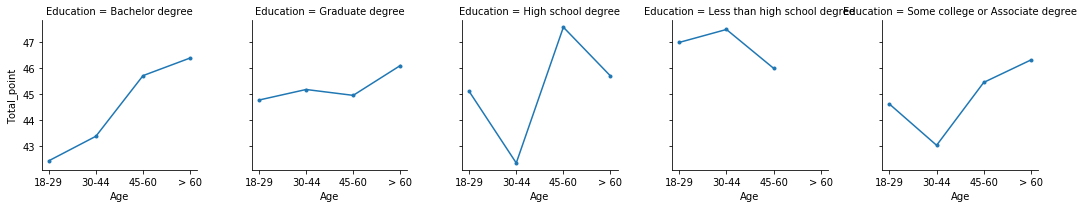

In [35]:
# Analysis


# Part 2: Mixed analysis

# Create mixed table 1, Average point in each age range for different education levels.

mixed_1 = df_1_2.groupby(['Age','Education'])['Total_point'].mean().reset_index()

# Mixed 
grid = sns.FacetGrid(mixed_1, col="Education", col_wrap=5)
grid.map(plt.plot, "Age", "Total_point", marker=".")

# The line in graduate degree is much more stable

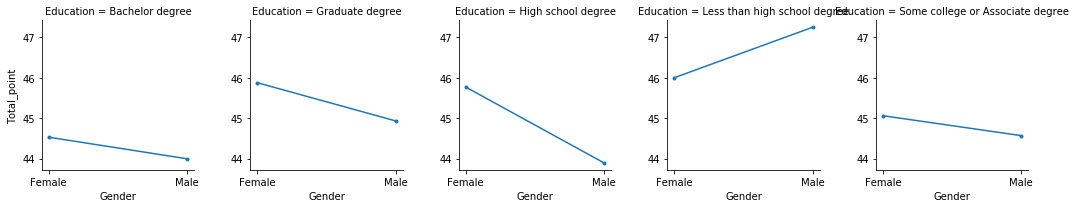

In [36]:
# Create mixed table 2, Average point in each Gender for different education levels.

mixed_2 = df_1_2.groupby(['Gender','Education'])['Total_point'].mean().reset_index()

# Mixed
grid_2 = sns.FacetGrid(mixed_2, col="Education", legend_out = True)
grid_2.map(plt.plot, "Gender", "Total_point", marker=".")

# In most cases, female has higher average point than male

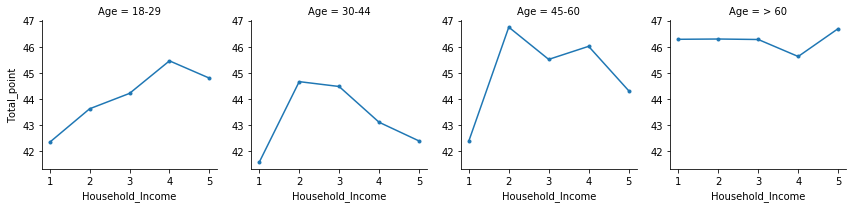

In [37]:
# Create mixed table 3, Average point in Household Income for different Age range.

mixed_3 = df_1_2.groupby(['Household_Income','Age'])['Total_point'].mean().reset_index()
                                       
# Mixed
grid_3 = sns.FacetGrid(mixed_3, col="Age", legend_out =True)
grid_3.map(plt.plot, "Household_Income", "Total_point", marker=".")

# With the same Household Income, the line in Age >= 60 is much more stable

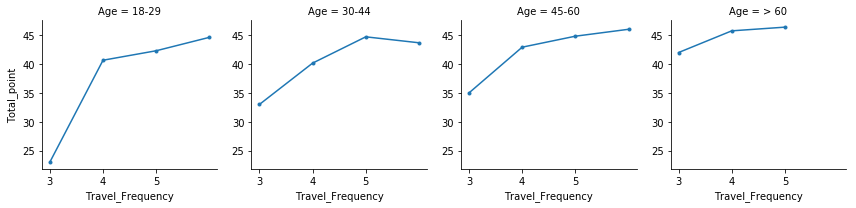

In [38]:
# Create mixed table 4, Average point in each Travel Frequency for different Age range

mixed_4 = df_1_2.groupby(['Travel_Frequency','Age'])['Total_point'].mean().reset_index()

# Mixed
grid_4 = sns.FacetGrid(mixed_4, col="Age")
grid_4.map(plt.plot, 'Travel_Frequency', "Total_point", marker=".")

#'Once a year or less': 5
#'Once a month or less': 4 
#'A few times per month': 3

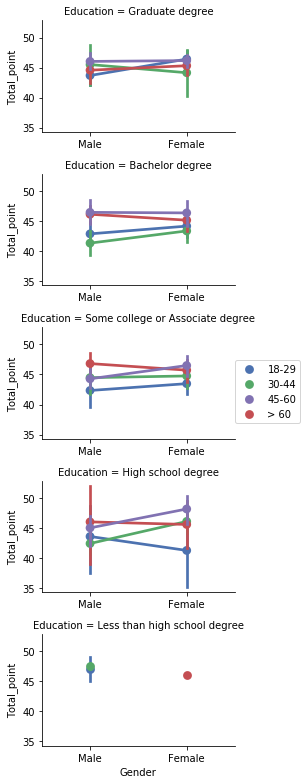

In [39]:
# Based on the mixed analysis above, we choose education, age and gender to further analysis

grid_5 = sns.FacetGrid(df_1_1, row='Education', size=2.2, aspect=1.6)
grid_5.map(sns.pointplot, 'Gender', 'Total_point', 'Age', palette='deep')
grid_5.add_legend()

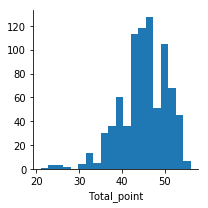

In [40]:
# Total point distribution
dis_p = sns.FacetGrid(df_1_1)
dis_p.map(plt.hist, 'Total_point', bins = 20)
plt.show()

In [41]:
# Customer Segmentation Part 


# Part 1 - with two labels based on the etiquette

# Base on the distribution |chart above
# Identify the customer with either higher/lower points above/under the 40

# The customer under the 40 point will be in the 'Risky_customer' list

# 1: above total_point 40, with common sense
# 0: under total_point 40, lack of common sense
df_1_2['etiquette'] = ['1' if i >= 45 else '0' for i in df_1_2.Total_point ]

C:\Users\hcysr\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [42]:
# create new data frame
df_2 = df_1_2

In [43]:
df_2

,Travel_Frequency,Recline_Frequency,Height,Children_under_18,RestArm_threeSeats,RestArm_twoSeats,Window_control,Switch_seats_unsold,Speak_Stranger,GetUp_5H_notAisle,...,Bring_children_unruly,Electronics_violation,Smoked_inAirplane,Gender,Age,Household_Income,Education,Location_Customer,Total_point,etiquette
1,5,About half the time,"6'3""",Yes,4,4,4,3,3,4,...,1,4,4,Male,30-44,3,Graduate degree,Pacific,51,1
2,5,Usually,"5'8""",No,2,4,0,3,3,5,...,3,4,4,Male,30-44,4,Bachelor degree,Pacific,49,1
3,5,Always,"5'11""",No,4,4,4,3,3,5,...,3,4,4,Male,30-44,1,Bachelor degree,Pacific,50,1
4,4,About half the time,"5'7""",No,3,2,4,3,3,4,...,3,0,4,Male,30-44,3,Bachelor degree,Pacific,42,0
5,5,Usually,"5'9""",Yes,2,3,0,2,3,1,...,3,4,4,Male,30-44,2,Graduate degree,East North Central,38,0
6,4,Once in a while,"6'2""",Yes,3,3,4,3,2,4,...,2,4,4,Male,30-44,5,Some college or Associate degree,Pacific,40,0
7,5,Once in a while,"6'0""",Yes,4,4,0,3,3,3,...,3,4,4,Male,30-44,1,Bachelor degree,New England,45,1
8,5,Never,"5'6""",No,1,0,4,1,1,0,...,3,4,4,Male,30-44,1,Bachelor degree,Pacific,24,0
9,4,Usually,"6'0""",No,4,4,4,1,3,3,...,3,4,4,Male,30-44,3,High school degree,Mountain,48,1
10,5,Once in a while,"6'0""",No,4,4,4,3,2,4,...,3,4,4,Male,18-29,5,Some college or Associate degree,East South Central,51,1


In [44]:
# create new data frame includes the columns with demographic data
df_Segment = df_2[['Travel_Frequency', 'Height', 'Children_under_18',
                     'Gender', 'Age', 'Education', 'Location_Customer', 
                     'Household_Income', 'etiquette']]


In [45]:
# Get dummies
df_Segment_1 = pd.get_dummies(df_Segment, columns = ['Travel_Frequency', 'Height', 'Children_under_18',
                                                   'Gender', 'Age', 'Education', 'Location_Customer', 'Household_Income'])
df_Segment_1.drop(['etiquette',], axis = 1, inplace = True)

#Join the dataframe that contains dummies variables into original dataframe
df_Segment = pd.concat([df_Segment, df_Segment_1], axis = 1) 

df_Segment.drop(['Travel_Frequency',  'Height', 'Children_under_18',
                 'Gender', 'Age', 'Education', 'Location_Customer','Household_Income'], axis = 1, inplace = True)

In [46]:
# split X and y columns
Segment_X = df_Segment.loc[: , df_Segment.columns != 'etiquette']
Segment_y = df_Segment['etiquette']

# split 'with Label' set into trainning set and testing set
Segment_X_train, Segment_X_test, Segment_y_train, Segment_y_test = train_test_split(Segment_X, Segment_y, test_size = 0.2)

# Random Forest model
RF_s = RandomForestClassifier(n_estimators = 5012, criterion = 'gini', max_features = None,
                                    max_depth = 256, min_samples_split = 15, min_samples_leaf = 10,
                                    random_state = 42)

RF_s.fit(Segment_X_train, Segment_y_train)
RF_pre = RF_s.predict(Segment_X_test)

print("RandomForest_Segment: ", accuracy_score(Segment_y_test, RF_pre))

# KNN
KNN_s = KNeighborsClassifier(n_neighbors = 10)
KNN_s.fit(Segment_X_train, Segment_y_train)
KNN_pre = KNN_s.predict(Segment_X_test)

print("KNN_Segment: ", accuracy_score(Segment_y_test, KNN_pre))


# This model is for identify the customer who might has risk to affect other passengers or flight in a negative way

RandomForest_Segment:  0.548192771084
KNN_Segment:  0.548192771084


In [47]:
# Create new Data Frame for the 'High_Risk' customers 
df_3 = df_S1

In [48]:
# Customer Segmentation



# Part 2 - From 'Risky_Customer' list, identify the customer who has the highest risk.



# Create new Data Frame
df_3 = df_3[['Travel_Frequency', 'Height', 'Children_under_18', 'Gender', 'Age', 'Education', 'Location_Customer', 
            'Household_Income', 'Recline_obligation', 'Bring_children_unruly', 'Electronics_violation', 'Smoked_inAirplane']]


# Reset point to the features below, 
# 0: not risky
# 1: risky
df_3['Recline_obligation'] = df_3['Recline_obligation'].map({'Yes, they should not recline their chair if the person behind them asks them not to': 0,
                                                             'No, the person on the flight has no obligation to the person behind them': 1})


df_3['Bring_children_unruly'] = df_3['Bring_children_unruly'].map({'Yes, very rude': 0,
                                                                   'Yes, somewhat rude': 0,
                                                                   'No, not at all rude': 1})

df_3['Electronics_violation'] = df_3['Electronics_violation'].map({'No': 0, 
                                                                   'Yes': 1})

df_3['Smoked_inAirplane'] = df_3['Smoked_inAirplane'].map({'No': 0,
                                                           'Yes': 1})

C:\Users\hcysr\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\hcysr\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\hcysr\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [49]:
# Calculate High Risk Point by the Four features above
df_3['Risk_point'] = df_3[df_3.columns[8:12]].sum(1)

# Drop the unneccessary columns
df_3 = df_3[['Travel_Frequency', 'Height', 'Children_under_18', 'Gender', 'Age', 'Education', 'Location_Customer', 
            'Household_Income', 'Risk_point']]
df_3.head()

C:\Users\hcysr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Travel_Frequency,Height,Children_under_18,Gender,Age,Education,Location_Customer,Household_Income,Risk_point
1,5,"6'3""",Yes,Male,30-44,Graduate degree,Pacific,3,0.0
2,5,"5'8""",No,Male,30-44,Bachelor degree,Pacific,4,0.0
3,5,"5'11""",No,Male,30-44,Bachelor degree,Pacific,1,0.0
4,4,"5'7""",No,Male,30-44,Bachelor degree,Pacific,3,0.0
5,5,"5'9""",Yes,Male,30-44,Graduate degree,East North Central,2,0.0


In [50]:
# Label the customer with High_risk 
df_3['Risky'] = ['1' if i >= 1 else '0' for i in df_3.Risk_point] 

# Drop the risk point column
df_3 = df_3[['Travel_Frequency', 'Height', 'Children_under_18', 'Gender', 'Age', 'Education', 'Location_Customer', 
            'Household_Income', 'Risky']]

df_3.head()

,Travel_Frequency,Height,Children_under_18,Gender,Age,Education,Location_Customer,Household_Income,Risky
1,5,"6'3""",Yes,Male,30-44,Graduate degree,Pacific,3,0
2,5,"5'8""",No,Male,30-44,Bachelor degree,Pacific,4,0
3,5,"5'11""",No,Male,30-44,Bachelor degree,Pacific,1,0
4,4,"5'7""",No,Male,30-44,Bachelor degree,Pacific,3,0
5,5,"5'9""",Yes,Male,30-44,Graduate degree,East North Central,2,0


In [51]:
df_3_0 = df_3

In [52]:
# Get dummies variables
df_3_0_1 = pd.get_dummies(df_3_0, columns = ['Travel_Frequency', 'Height', 'Children_under_18',
                                                   'Gender', 'Age', 'Education', 'Location_Customer', 'Household_Income'])
df_3_0_1.drop(['Risky',], axis = 1, inplace = True)

#Join the dataframe that contains dummies variables into original dataframe
df_3_0 = pd.concat([df_3_0, df_3_0_1], axis = 1) 

df_3_0.drop(['Travel_Frequency',  'Height', 'Children_under_18',
                 'Gender', 'Age', 'Education', 'Location_Customer','Household_Income'], axis = 1, inplace = True)

In [53]:
# Modeling

# split X and y columns
Segment_2_X = df_3_0.loc[: , df_3.columns != 'Risky']
Segment_2_y = df_3_0['Risky']

# split 'with Label' set into trainning set and testing set
Segment_2_X_train, Segment_2_X_test, Segment_2_y_train, Segment_2_y_test = train_test_split(Segment_X, Segment_y, test_size = 0.2)

# Random Forest model
RF_s_2 = RandomForestClassifier(n_estimators = 5012, criterion = 'gini', max_features = None,
                                    max_depth = 556, min_samples_split = 15, min_samples_leaf = 10,
                                    random_state = 42)

RF_s_2.fit(Segment_2_X_train, Segment_2_y_train)
RF_pre_2 = RF_s.predict(Segment_2_X_test)

print("RandomForest_Segment: ", accuracy_score(Segment_2_y_test, RF_pre_2))

# KNN
KNN_s_2 = KNeighborsClassifier(n_neighbors = 10)
KNN_s_2.fit(Segment_2_X_train, Segment_2_y_train)
KNN_pre_2 = KNN_s_2.predict(Segment_2_X_test)

print("KNN_Segment: ", accuracy_score(Segment_2_y_test, KNN_pre_2))


# This model is for predict whether or not a certain passenger is risky (might affect others/flight)
# The airline company can either raise his/her rate or pay more attention to such passengers

RandomForest_Segment:  0.710843373494
KNN_Segment:  0.548192771084
